In [255]:
import pandas as pd
import numpy as np
import talib
from talib.abstract import *


import matplotlib as mpl
import matplotlib.pyplot as plt
from treeinterpreter import treeinterpreter as ti

mpl.style.use('ggplot')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, precision_score, \
                            recall_score, accuracy_score, recall_score, \
                            roc_curve, auc, roc_auc_score, precision_recall_curve

from imblearn.over_sampling import SMOTE

from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from collections import Counter, OrderedDict, defaultdict
import operator
from pprint import pprint as pp

%matplotlib inline
np.random.seed(42)
pd.options.display.max_columns = None

In [256]:
df = pd.read_csv('../data/BTCUSDT-2016-01-01 -2018-06-06 .csv')
df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1502942400000,4261.48,4280.56,4261.48,4261.48,2.189061,1502943299999,9333.620962,9,0.489061,2089.104962,7958.417415
1,1502943300000,4261.48,4270.41,4261.32,4261.45,9.119865,1502944199999,38891.133046,40,3.447113,14703.934995,7922.579933
2,1502944200000,4280.00,4310.07,4267.99,4310.07,21.923552,1502945099999,94080.917568,58,20.421317,87620.977876,7912.494217
3,1502945100000,4310.07,4313.62,4291.37,4308.83,13.948531,1502945999999,60060.466816,64,10.803012,46538.460109,7887.635513
4,1502946000000,4308.83,4328.69,4304.31,4304.31,5.101153,1502946899999,22006.533111,44,3.496635,15093.783057,7865.654419


In [257]:
df.isnull().sum()

Open time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
Ignore                          0
dtype: int64

In [258]:
df.describe()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
count,2.820600e+04,28206.000000,28206.000000,28206.000000,28206.000000,28206.000000,2.820600e+04,2.820600e+04,28206.000000,28206.000000,2.820600e+04,28206.000000
mean,1.515582e+12,8592.317064,8635.390467,8547.292634,8592.301308,216.624902,1.515583e+12,2.050373e+06,1741.964440,108.189635,1.026949e+06,8689.106374
std,7.310640e+09,3451.566891,3477.970000,3422.207769,3451.381895,275.342471,7.310640e+09,2.512126e+06,2068.900248,135.345792,1.238765e+06,14192.785620
min,1.502942e+12,2830.000000,2880.010000,2817.000000,2820.000000,0.000000,1.502943e+12,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,1.509249e+12,5997.952500,6029.982500,5960.000000,5999.902500,18.670297,1.509250e+12,1.078379e+05,129.000000,8.742069,4.941637e+04,0.000000
50%,1.515539e+12,8228.500000,8250.000000,8202.555000,8229.475000,145.865655,1.515540e+12,1.506602e+06,1285.000000,73.746442,7.502483e+05,0.000000
75%,1.521942e+12,10406.777500,10474.862500,10334.750000,10404.837500,300.014244,1.521943e+12,2.917050e+06,2489.000000,154.059955,1.485123e+06,12619.111688
max,1.528223e+12,19756.000000,19798.680000,19680.200000,19756.020000,5207.928500,1.528224e+12,4.025117e+07,34251.000000,2676.383521,2.068599e+07,79920.622111


In [259]:
df.drop(['Open time', 'Close time', 'Ignore'], axis=1, inplace=True)
df.head()

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,4261.48,4280.56,4261.48,4261.48,2.189061,9333.620962,9,0.489061,2089.104962
1,4261.48,4270.41,4261.32,4261.45,9.119865,38891.133046,40,3.447113,14703.934995
2,4280.00,4310.07,4267.99,4310.07,21.923552,94080.917568,58,20.421317,87620.977876
3,4310.07,4313.62,4291.37,4308.83,13.948531,60060.466816,64,10.803012,46538.460109
4,4308.83,4328.69,4304.31,4304.31,5.101153,22006.533111,44,3.496635,15093.783057


<Figure size 2880x720 with 0 Axes>

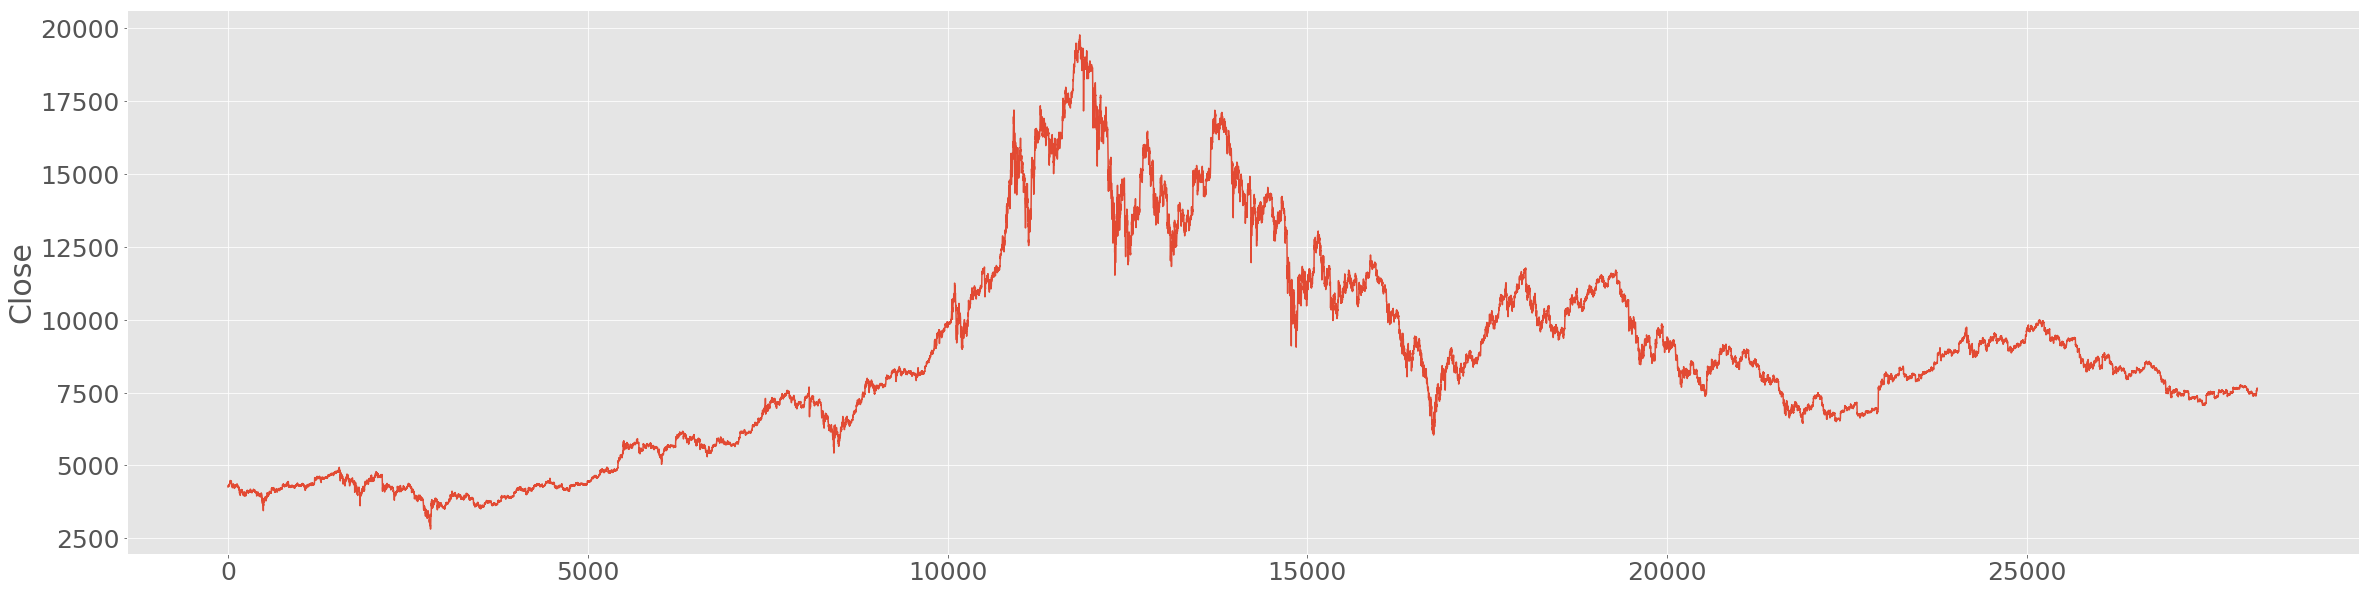

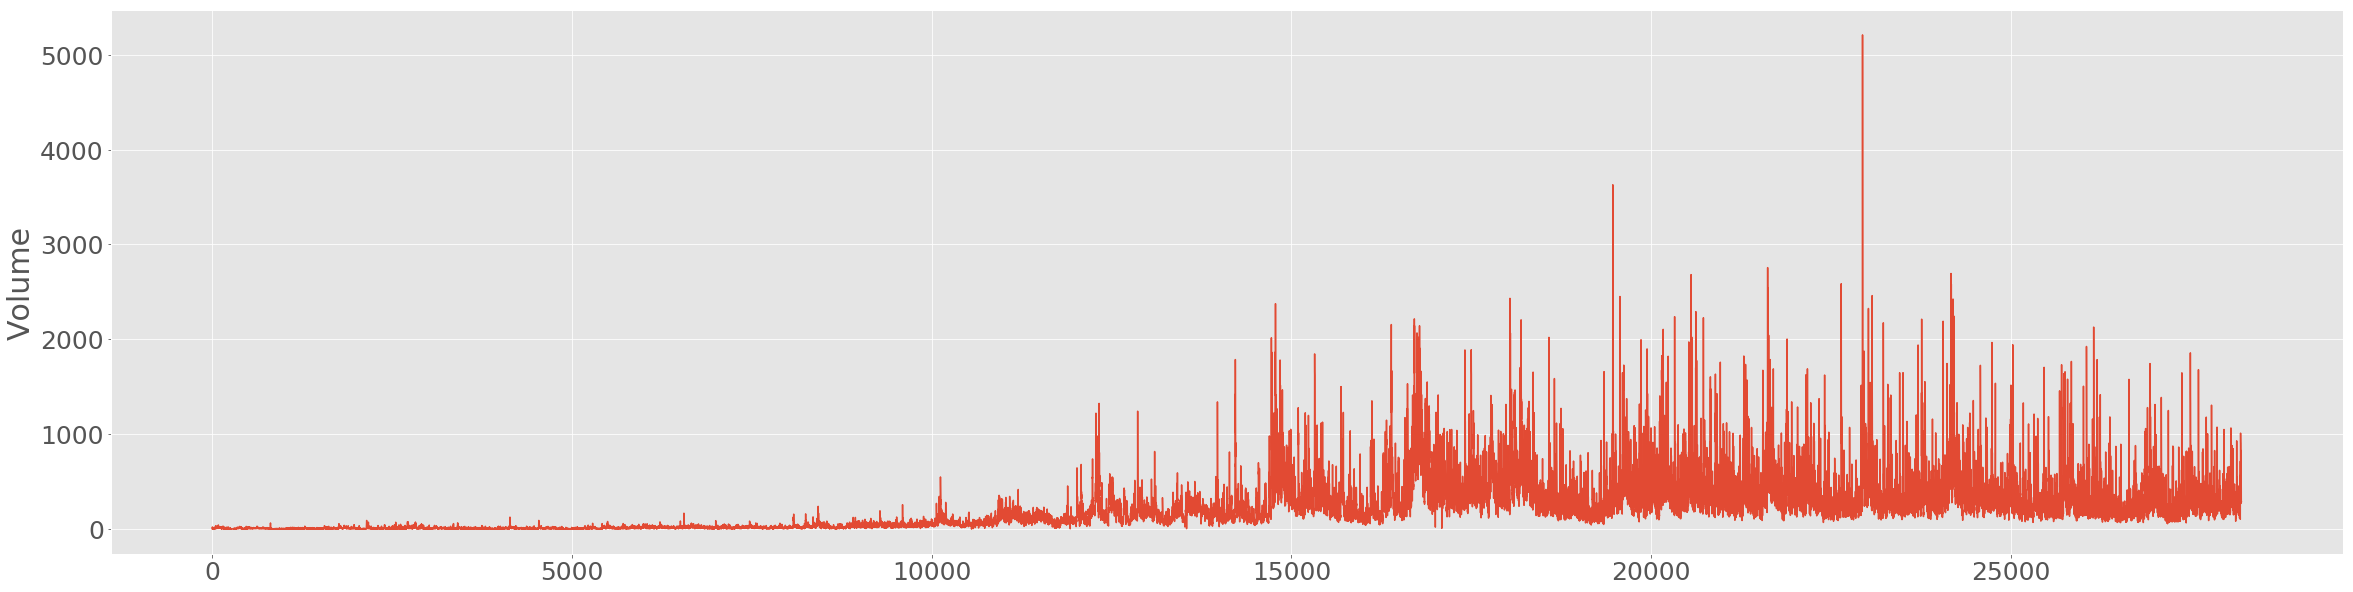

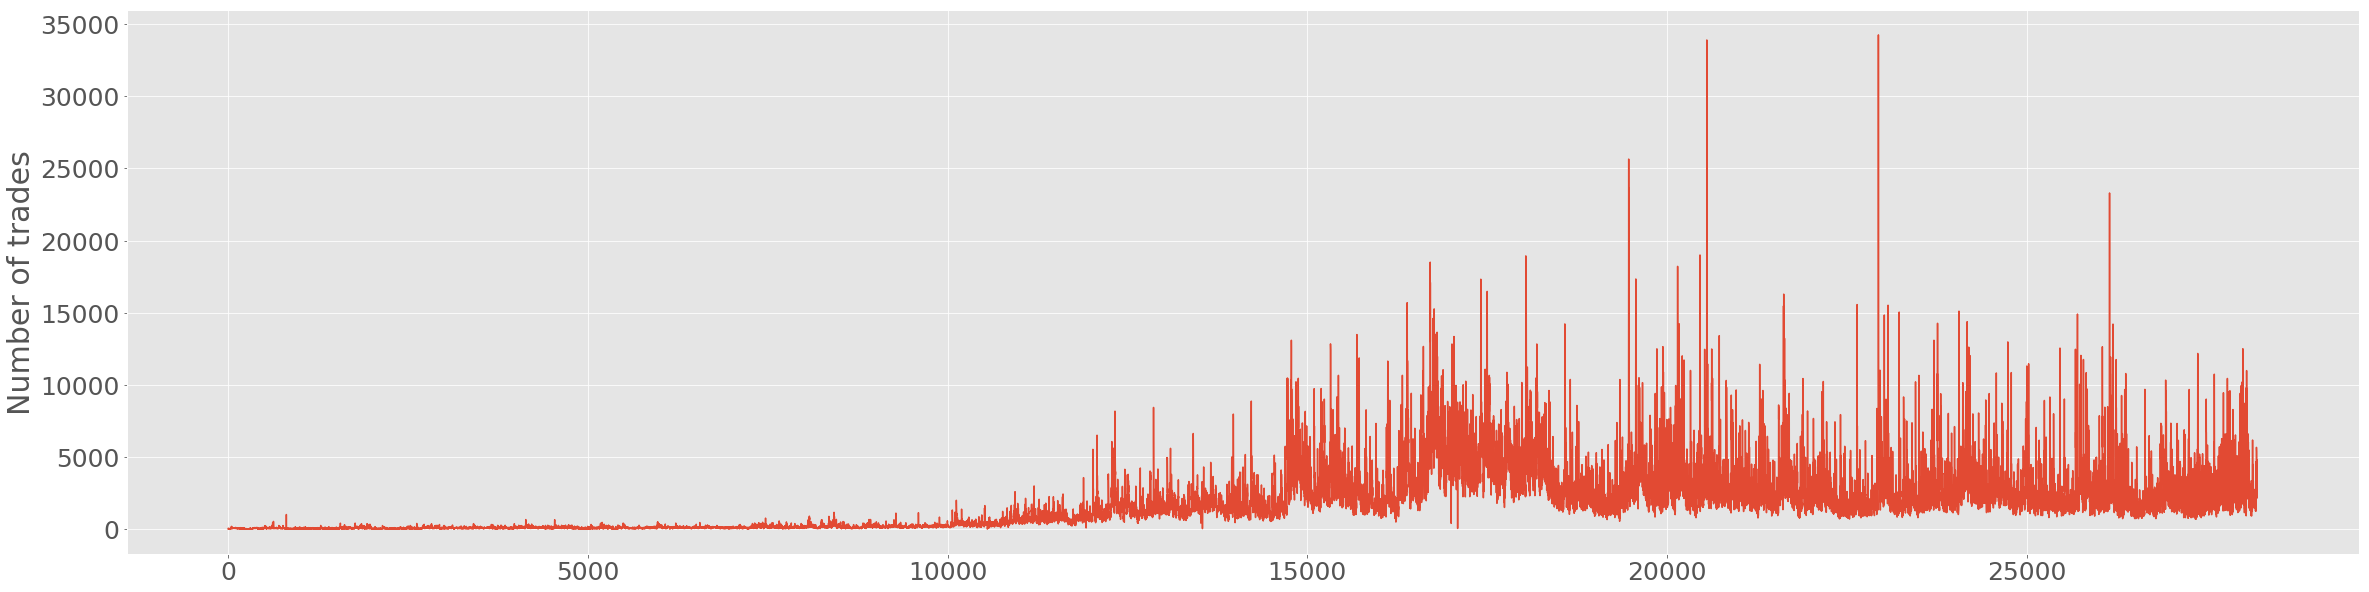

In [260]:
plt.figure(figsize=(40,10))
mpl.rcParams.update({'font.size': 25})
for f in ['Close', 'Volume', 'Number of trades']:
    plt.figure(figsize=(40,10))
    mpl.rcParams.update({'font.size': 25})
    plt.plot(getattr(df, f))
    plt.ylabel(f)
    plt.show()

In [261]:
analysis = talib.get_function_groups()
analysis

{'Cycle Indicators': ['HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE'],
 'Math Operators': ['ADD',
  'DIV',
  'MAX',
  'MAXINDEX',
  'MIN',
  'MININDEX',
  'MINMAX',
  'MINMAXINDEX',
  'MULT',
  'SUB',
  'SUM'],
 'Math Transform': ['ACOS',
  'ASIN',
  'ATAN',
  'CEIL',
  'COS',
  'COSH',
  'EXP',
  'FLOOR',
  'LN',
  'LOG10',
  'SIN',
  'SINH',
  'SQRT',
  'TAN',
  'TANH'],
 'Momentum Indicators': ['ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR'],
 'Overlap Studies': ['BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
  'SAR',
  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA'],
 'Pattern Recognition': ['CDL2CROWS',
  'C

In [262]:
inputs = {
    'open': df.Open,
    'high': df.High,
    'low': df.Low,
    'close': df.Close,
    'volume': df.Volume
}

In [263]:
# df['SMA'] = SMA(inputs, timeperiod=25)

In [264]:
for f in analysis['Pattern Recognition'] \
       + analysis['Volume Indicators']\
       + analysis['Volatility Indicators']:
#        + analysis['Momentum Indicators']:
            
    output = getattr(talib.abstract, f)(inputs)
    if isinstance(output, np.ndarray):
        print(f)
        df[f] = output
    else:
        for i in range(len(output)):
            f_i = '%s_%s'%(f, i)
            print(f_i)
            df[f_i] = output[i]

CDL2CROWS
CDL3BLACKCROWS
CDL3INSIDE
CDL3LINESTRIKE
CDL3OUTSIDE
CDL3STARSINSOUTH
CDL3WHITESOLDIERS
CDLABANDONEDBABY
CDLADVANCEBLOCK
CDLBELTHOLD
CDLBREAKAWAY
CDLCLOSINGMARUBOZU
CDLCONCEALBABYSWALL
CDLCOUNTERATTACK
CDLDARKCLOUDCOVER
CDLDOJI
CDLDOJISTAR
CDLDRAGONFLYDOJI
CDLENGULFING
CDLEVENINGDOJISTAR
CDLEVENINGSTAR
CDLGAPSIDESIDEWHITE
CDLGRAVESTONEDOJI
CDLHAMMER
CDLHANGINGMAN
CDLHARAMI
CDLHARAMICROSS
CDLHIGHWAVE
CDLHIKKAKE
CDLHIKKAKEMOD
CDLHOMINGPIGEON
CDLIDENTICAL3CROWS
CDLINNECK
CDLINVERTEDHAMMER
CDLKICKING
CDLKICKINGBYLENGTH
CDLLADDERBOTTOM
CDLLONGLEGGEDDOJI
CDLLONGLINE
CDLMARUBOZU
CDLMATCHINGLOW
CDLMATHOLD
CDLMORNINGDOJISTAR
CDLMORNINGSTAR
CDLONNECK
CDLPIERCING
CDLRICKSHAWMAN
CDLRISEFALL3METHODS
CDLSEPARATINGLINES
CDLSHOOTINGSTAR
CDLSHORTLINE
CDLSPINNINGTOP
CDLSTALLEDPATTERN
CDLSTICKSANDWICH
CDLTAKURI
CDLTASUKIGAP
CDLTHRUSTING
CDLTRISTAR
CDLUNIQUE3RIVER
CDLUPSIDEGAP2CROWS
CDLXSIDEGAP3METHODS
AD
ADOSC
OBV
ATR
NATR
TRANGE


In [265]:
df.head()

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,AD,ADOSC,OBV,ATR,NATR,TRANGE
0,4261.48,4280.56,4261.48,4261.48,2.189061,9333.620962,9,0.489061,2089.104962,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.189061,NaN,2.189061,NaN,NaN,NaN
1,4261.48,4270.41,4261.32,4261.45,9.119865,38891.133046,40,3.447113,14703.934995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-11.048072,NaN,-6.930804,NaN,NaN,9.09
2,4280.00,4310.07,4267.99,4310.07,21.923552,94080.917568,58,20.421317,87620.977876,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.875480,NaN,14.992748,NaN,NaN,48.62
3,4310.07,4313.62,4291.37,4308.83,13.948531,60060.466816,64,10.803012,46538.460109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18.818307,NaN,1.044217,NaN,NaN,22.25
4,4308.83,4328.69,4304.31,4304.31,5.101153,22006.533111,44,3.496635,15093.783057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.717154,NaN,-4.056936,NaN,NaN,24.38


In [266]:
print(len(df))
print(len(df.columns))

28206
76


In [267]:
df1 = pd.DataFrame({
    'a': [1,2,3,4,5,6,7,8],
    'b': [2,4,6,8,10,12,14,16]
})
df1.b.shift(1)

0     NaN
1     2.0
2     4.0
3     6.0
4     8.0
5    10.0
6    12.0
7    14.0
Name: b, dtype: float64

In [268]:
df['Returns_1hr'] = df.Close.shift(4)/df.Close*100 -100
df['Returns_1hr'].describe()

count    28202.000000
mean         0.001959
std          1.426201
min        -17.802437
25%         -0.588157
50%         -0.037511
75%          0.524276
max         14.343860
Name: Returns_1hr, dtype: float64

In [269]:
df['Returns_2hr'] = df.Close.shift(8)/df.Close*100 -100
df['Returns_2hr'].describe()

count    28198.000000
mean         0.002310
std          1.930601
min        -18.742583
25%         -0.838858
50%         -0.082260
75%          0.736010
max         21.587559
Name: Returns_2hr, dtype: float64

In [270]:
df['Returns_3hr'] = df.Close.shift(12)/df.Close*100 -100
df['Returns_3hr'].describe()

count    28194.000000
mean         0.001655
std          2.276934
min        -24.013796
25%         -1.017102
50%         -0.092912
75%          0.894960
max         24.120743
Name: Returns_3hr, dtype: float64

In [271]:
# plt.boxplot(df.Returns_1hr)

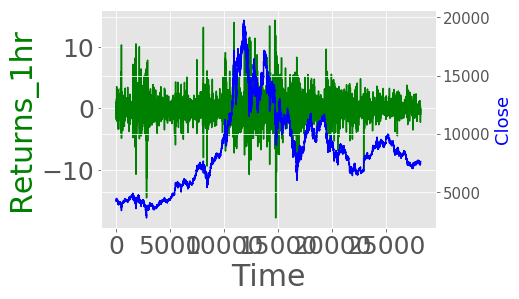

<Figure size 3600x720 with 0 Axes>

In [272]:
fig, ax1 = plt.subplots()
plt.figure(figsize=(50,10))

mpl.rcParams.update({'font.size': 15})
ax2 = ax1.twinx()

x = range(len(df))
ax1.plot(x, df.Returns_1hr, 'g-')
ax2.plot(x, df.Close, 'b-')

ax1.set_xlabel('Time')
ax1.set_ylabel('Returns_1hr', color='g')
ax2.set_ylabel('Close', color='b')
# plt.tight_layout()
plt.show()

In [273]:
# Removing starting rows containing NA due to time series
# df = df.iloc[50:]

In [274]:
temp = df.Returns_3hr.apply(np.floor).dropna()
Counter(temp)

Counter({-25.0: 1,
         -23.0: 1,
         -21.0: 2,
         -17.0: 1,
         -16.0: 2,
         -14.0: 3,
         -13.0: 3,
         -12.0: 9,
         -11.0: 22,
         -10.0: 27,
         -9.0: 49,
         -8.0: 61,
         -7.0: 130,
         -6.0: 182,
         -5.0: 390,
         -4.0: 838,
         -3.0: 1732,
         -2.0: 3687,
         -1.0: 7862,
         0.0: 6600,
         1.0: 2937,
         2.0: 1661,
         3.0: 837,
         4.0: 441,
         5.0: 273,
         6.0: 144,
         7.0: 101,
         8.0: 57,
         9.0: 41,
         10.0: 34,
         11.0: 18,
         12.0: 21,
         13.0: 8,
         14.0: 12,
         15.0: 1,
         16.0: 2,
         19.0: 2,
         21.0: 1,
         24.0: 1})

In [275]:
def assign_class(x):
    if x>=5:
        return 5
    elif x<=-5:
        return -5
    else:
        return np.trunc(x)
    
assign_class(-0.1)

-0.0

In [276]:
# Dropping unnecessary variables
df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 
         'Quote asset volume', 'Number of trades', 
         'Taker buy base asset volume', 'Taker buy quote asset volume'], 
          axis=1, inplace=True)

# Dropping created variables
df.drop(['Returns_1hr', 'Returns_2hr'], axis=1, inplace=True)

In [277]:
df.dropna(inplace=True)
y = df.Returns_3hr.apply(assign_class)
df.drop(['Returns_3hr'], axis=1, inplace=True)
X = df.values
Counter(y)

Counter({-5.0: 493,
         -4.0: 390,
         -3.0: 838,
         -2.0: 1732,
         -1.0: 3686,
         0.0: 14461,
         1.0: 2937,
         2.0: 1661,
         3.0: 837,
         4.0: 441,
         5.0: 716})

(array([  493.,   390.,   838.,  1732.,  3686., 14461.,  2937.,  1661.,
          837.,  1157.]),
 array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <a list of 10 Patch objects>)

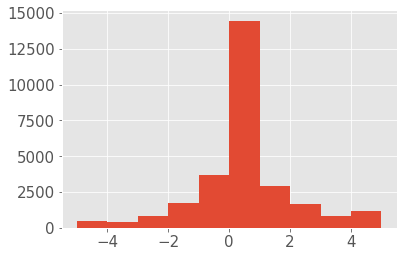

In [278]:
plt.hist(y)

In [291]:
# Number of trees in random forest
n_estimators = [x for x in range(10,200,10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = None
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
#                'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190]}

In [292]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.80, 
                                                    test_size=0.20,
                                                    stratify=y, # For splitting imbalanced dataset
                                                    random_state=42)
print('Splitting complete')


X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train)
print('Oversampling complete')

# from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
# from sklearn.feature_selection import VarianceThreshold

tpot_config = {
    'sklearn.ensemble.RandomForestClassifier': random_grid,
    'sklearn.feature_selection.VarianceThreshold': {}
}

# http://epistasislab.github.io/tpot/api/
# http://epistasislab.github.io/tpot/using/#customizing-tpots-operators-and-parameters
# https://stackoverflow.com/questions/36633460/ how-to-get-feature-names-selected-by-feature-elimination-in-sklearn-pipeline?rq=1
tpot = TPOTClassifier(generations=5, 
                      population_size=20,
                      cv=5,
                      config_dict=tpot_config, # Can be "TPOT MDR"
                      verbosity=2,
                      early_stop=2,
                      n_jobs=-1)

tpot.fit(X_resampled, y_resampled)
print(tpot.score(X_test, y_test))
tpot.export('tpot_pipeline.py')

Splitting complete
Oversampling complete


Generation 1 - Current best internal CV score: 0.9237263758795695


Generation 2 - Current best internal CV score: 0.9237263758795695


The optimized pipeline was not improved after evaluating 2 more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.



Best pipeline: RandomForestClassifier(CombineDFs(input_matrix, input_matrix), bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=40)
0.5300585210143642


True

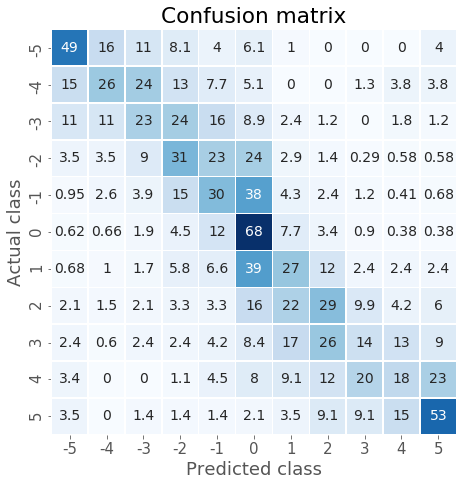

In [286]:
def confusion_plot(y_test, y_predicted):
    cm = confusion_matrix(y_test, y_predicted)

    # Scaling values
    cm = cm.astype('float')*100 / cm.sum(axis=1)[:, np.newaxis] 
    np.set_printoptions(suppress=True)
    mpl.rc("figure", figsize=(7,7)) #subplot size

    hm = sns.heatmap(cm, 
                cbar=False,
                annot=True, 
                square=True,
                yticklabels=[-5,-4,-3,-2,-1,0,1,2,3,4,5],
                xticklabels=sorted(list(set(y_test)))
                cmap='Blues',
                linewidths =.5,
                annot_kws={'size':14} #text size
                )
    plt.title('Confusion matrix')
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')
    plt.tight_layout()
#     plt.savefig('confusion_matrix.png', dpi=100)
    plt.show()

confusion_plot(y_test, tpot.predict(X_test))